In [1]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
from sklearn.svm import SVR
from sklearn.svm import SVC
import re
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from sklearn import ensemble
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score

sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Challenge #1 Boston Marathon

In [266]:

bm2013 = pd.read_csv('C://Users/ezzan/Downloads/2013.csv')

bm2013.head()

25k  age               name  division    10k gender   half  official bib  \
0  49.87   28   Cassidy, Josh R.         9  18.18      M  40.93     90.90  W1   
1  77.27   30      Korir, Wesley         5  30.90      M  64.90    132.50   1   
2  77.23   23     Desisa, Lelisa         1  30.90      M  64.92    130.37   2   
3  50.50   32  Fearnley, Kurt H.         5  18.73      M  42.00     88.43  W2   
4  48.75   39     Hokinoue, Kota         3  18.18      M  40.57     87.22  W3   

   ctz   ...   overall  pace  state    30k     5k genderdiv    20k     35k  \
0  NaN   ...         9  3.47     ON  62.07   8.90         9  38.80   74.73   
1  NaN   ...         5  5.07    NaN  92.97  15.90         5  61.52  108.78   
2  NaN   ...         1  4.98    NaN  92.72  15.93         1  61.53  108.68   
3  NaN   ...         5  3.38    NaN  61.35   8.98         5  39.88   73.00   
4  NaN   ...         3  3.33    NaN  59.92   8.92         3  38.55   71.68   

       city     40k  
0   Toronto   85.55  
1     Kenya  124.77  
2      Ambo  123.78  
3  Hamilton   83.43  
4    Iizuka   81.88  

[5 rows x 21 columns]

In [267]:
#drop all non-variables
bm2013 = bm2013.drop(['name', 'bib', 'ctz', 'state', 'city', 'country', 'genderdiv'], axis = 1)
bm2013.head()

25k  age  division    10k gender   half  official  overall  pace    30k  \
0  49.87   28         9  18.18      M  40.93     90.90        9  3.47  62.07   
1  77.27   30         5  30.90      M  64.90    132.50        5  5.07  92.97   
2  77.23   23         1  30.90      M  64.92    130.37        1  4.98  92.72   
3  50.50   32         5  18.73      M  42.00     88.43        5  3.38  61.35   
4  48.75   39         3  18.18      M  40.57     87.22        3  3.33  59.92   

      5k    20k     35k     40k  
0   8.90  38.80   74.73   85.55  
1  15.90  61.52  108.78  124.77  
2  15.93  61.53  108.68  123.78  
3   8.98  39.88   73.00   83.43  
4   8.92  38.55   71.68   81.88

In [268]:
cols = ['25k', 'half', '30k','10k', '20k', '35k', '40k', '5k']
bm2013[cols] = bm2013[cols].apply(pd.to_numeric, errors='coerce', axis=1)
bm2013['gender'] = bm2013.gender.map(lambda x: 0 if x is 'F' else 1)
bm2013 = bm2013.dropna()

In [269]:

# Make sure the number of rows divides evenly into four samples.
rows = bm2013.shape[0] - bm2013.shape[0] % 4
bm2013 = bm2013.iloc[:rows, :]


X = bm2013
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Break into a set of features and a variable for the known outcome.
X = bm2013.iloc[:, :13]
y = bm2013.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

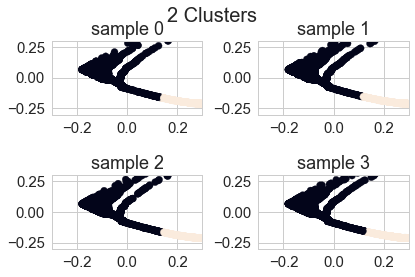

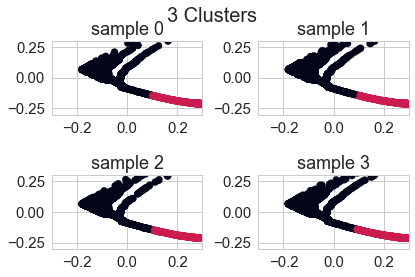

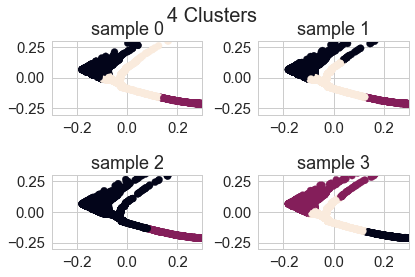

In [270]:

# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [271]:
#N-clusters = 2
cluster_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(2):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print(frame.describe())

0
               25k          age     division          10k       gender  \
count  8372.000000  8372.000000  8372.000000  8372.000000  8372.000000   
mean    108.987292    38.744267   875.934544    43.359973     0.776278   
std       9.196701     9.372407   761.177683     3.795191     0.416763   
min      48.320000    18.000000     1.000000    18.030000     0.000000   
25%     104.027500    31.000000   263.000000    41.380000     1.000000   
50%     109.560000    39.000000   687.000000    43.550000     1.000000   
75%     115.800000    46.000000  1205.000000    46.020000     1.000000   
max     128.530000    73.000000  3077.000000    54.930000     1.000000   

              half     official      overall         pace          30k  \
count  8372.000000  8372.000000  8372.000000  8372.000000  8372.000000   
mean     91.718100   189.936211  4258.169971     7.252217   131.905368   
std       7.790583    15.749052  2496.297836     0.600790    11.025560   
min      40.270000    85.530000    

In [272]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7362280975300026
0.7400339017107224
0.7417472750200313
0.737468225777423


In [273]:
cluster_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(2):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print(frame.describe())

0
               25k          age     division          10k       gender  \
count  5493.000000  5493.000000  5493.000000  5493.000000  5493.000000   
mean    120.126461    41.894411  1125.778809    47.639370     0.511742   
std       5.123305    10.026647   814.023473     2.384096     0.499908   
min      94.300000    18.000000     1.000000    36.780000     0.000000   
25%     116.950000    35.000000   461.000000    46.170000     0.000000   
50%     120.500000    43.000000  1012.000000    47.880000     1.000000   
75%     123.830000    50.000000  1486.000000    49.280000     1.000000   
max     135.050000    72.000000  3304.000000    56.380000     1.000000   

              half     official       overall         pace          30k  \
count  5493.000000  5493.000000   5493.000000  5493.000000  5493.000000   
mean    100.956738   210.558507   8631.976516     8.038915   145.689372   
std       4.547817     6.194792   1691.280815     0.236515     5.621314   
min      79.250000   199.150000

In [274]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7537762131429461
0.7531156012752681
0.7532363324145325
0.7486108637900436


### Observations
In the data set featuring 2 n clusters, Cluster 1 contained about 78 percent male, an avergae age of 38 and a pace of 7.25 minute miles.Cluster 2 contained about 60 percent women, an avergae age of 44 and a pace of 8.7 minute miles.
Cluster 1 seemed to have included younger male runners with enhanced running abilities.

# Challenge: Make your Network

In [275]:
Titanic = pd.read_csv('/Users/ezzan/Downloads/python_drills/titanic.csv')
Titanic.dtypes
Titanic["alone"]=Titanic["alone"].fillna(0).astype(bool)
#Titanic["adult_male"]=Titanic["adult_male"].fillna(0).astype(bool)

Titanic["sex"] = Titanic["sex"].map({"male": 1, "female":0}).fillna(0).astype(np.int64)
Titanic['age'] = Titanic['age'].fillna(Titanic['age'].median()).astype(np.int64)
Titanic['adult_male'] = Titanic['adult_male'].map({'True': 1, 'False':0}).fillna(0).astype(np.int64)
Titanic = Titanic.drop(["embark_town", "deck", "alive"], axis=1)
#Titanic.birth_year.astype(int)
Titanic['embarked'] = Titanic['embarked'].map( {'S': 0, 'C': 1, 'Q': 2}).fillna(0).astype(np.int64)
#Titanic['alive'] = Titanic['alive'].map( {'no': 0, 'yes': 1} ).fillna(0).astype(np.int64)
Titanic['alone'] = Titanic["alone"].map({'True': 1, 'False':0}).fillna(0).astype(np.int64)
Titanic['class'] = Titanic["class"].map({"First": 1, "Second":2, "Third":3}).fillna(0).astype(np.int64)
Titanic['who'] = Titanic["who"].map({"man": 1, "woman":2, "child":3}).fillna(0).astype(np.int64)
Titanic["fare"] = Titanic["fare"].astype(np.int64)
Titanic

survived  pclass  sex  age  sibsp  parch  fare  embarked  class  who  \
0           0       3    1   22      1      0     7         0      3    1   
1           1       1    0   38      1      0    71         1      1    2   
2           1       3    0   26      0      0     7         0      3    2   
3           1       1    0   35      1      0    53         0      1    2   
4           0       3    1   35      0      0     8         0      3    1   
5           0       3    1   28      0      0     8         2      3    1   
6           0       1    1   54      0      0    51         0      1    1   
7           0       3    1    2      3      1    21         0      3    3   
8           1       3    0   27      0      2    11         0      3    2   
9           1       2    0   14      1      0    30         1      2    3   
10          1       3    0    4      1      1    16         0      3    3   
11          1       1    0   58      0      0    26         0      1    2   
12          0       3    1   20      0      0     8         0      3    1   
13          0       3    1   39      1      5    31         0      3    1   
14          0       3    0   14      0      0     7         0      3    3   
15          1       2    0   55      0      0    16         0      2    2   
16          0       3    1    2      4      1    29         2      3    3   
17          1       2    1   28      0      0    13         0      2    1   
18          0       3    0   31      1      0    18         0      3    2   
19          1       3    0   28      0      0     7         1      3    2   
20          0       2    1   35      0      0    26         0      2    1   
21          1       2    1   34      0      0    13         0      2    1   
22          1       3    0   15      0      0     8         2      3    3   
23          1       1    1   28      0      0    35         0      1    1   
24          0       3    0    8      3      1    21         0      3    3   
25          1       3    0   38      1      5    31         0      3    2   
26          0       3    1   28      0      0     7         1      3    1   
27          0       1    1   19      3      2   263         0      1    1   
28          1       3    0   28      0      0     7         2      3    2   
29          0       3    1   28      0      0     7         0      3    1   
..        ...     ...  ...  ...    ...    ...   ...       ...    ...  ...   
861         0       2    1   21      1      0    11         0      2    1   
862         1       1    0   48      0      0    25         0      1    2   
863         0       3    0   28      8      2    69         0      3    2   
864         0       2    1   24      0      0    13         0      2    1   
865         1       2    0   42      0      0    13         0      2    2   
866         1       2    0   27      1      0    13         1      2    2   
867         0       1    1   31      0      0    50         0      1    1   
868         0       3    1   28      0      0     9         0      3    1   
869         1       3    1    4      1      1    11         0      3    3   
870         0       3    1   26      0      0     7         0      3    1   
871         1       1    0   47      1      1    52         0      1    2   
872         0       1    1   33      0      0     5         0      1    1   
873         0       3    1   47      0      0     9         0      3    1   
874         1       2    0   28      1      0    24         1      2    2   
875         1       3    0   15      0      0     7         1      3    3   
876         0       3    1   20      0      0     9         0      3    1   
877         0       3    1   19      0      0     7         0      3    1   
878         0       3    1   28      0      0     7         0      3    1   
879         1       1    0   56      0      1    83         1      1    2   
880         1       2    0   25      0      1    26         0      2    2   
8

In [276]:
Titanic.dtypes

survived      int64
pclass        int64
sex           int64
age           int64
sibsp         int64
parch         int64
fare          int64
embarked      int64
class         int64
who           int64
adult_male    int64
alone         int64
dtype: object

In [277]:
#get dummies didnt work
pd.get_dummies(Titanic)

survived  pclass  sex  age  sibsp  parch  fare  embarked  class  who  \
0           0       3    1   22      1      0     7         0      3    1   
1           1       1    0   38      1      0    71         1      1    2   
2           1       3    0   26      0      0     7         0      3    2   
3           1       1    0   35      1      0    53         0      1    2   
4           0       3    1   35      0      0     8         0      3    1   
5           0       3    1   28      0      0     8         2      3    1   
6           0       1    1   54      0      0    51         0      1    1   
7           0       3    1    2      3      1    21         0      3    3   
8           1       3    0   27      0      2    11         0      3    2   
9           1       2    0   14      1      0    30         1      2    3   
10          1       3    0    4      1      1    16         0      3    3   
11          1       1    0   58      0      0    26         0      1    2   
12          0       3    1   20      0      0     8         0      3    1   
13          0       3    1   39      1      5    31         0      3    1   
14          0       3    0   14      0      0     7         0      3    3   
15          1       2    0   55      0      0    16         0      2    2   
16          0       3    1    2      4      1    29         2      3    3   
17          1       2    1   28      0      0    13         0      2    1   
18          0       3    0   31      1      0    18         0      3    2   
19          1       3    0   28      0      0     7         1      3    2   
20          0       2    1   35      0      0    26         0      2    1   
21          1       2    1   34      0      0    13         0      2    1   
22          1       3    0   15      0      0     8         2      3    3   
23          1       1    1   28      0      0    35         0      1    1   
24          0       3    0    8      3      1    21         0      3    3   
25          1       3    0   38      1      5    31         0      3    2   
26          0       3    1   28      0      0     7         1      3    1   
27          0       1    1   19      3      2   263         0      1    1   
28          1       3    0   28      0      0     7         2      3    2   
29          0       3    1   28      0      0     7         0      3    1   
..        ...     ...  ...  ...    ...    ...   ...       ...    ...  ...   
861         0       2    1   21      1      0    11         0      2    1   
862         1       1    0   48      0      0    25         0      1    2   
863         0       3    0   28      8      2    69         0      3    2   
864         0       2    1   24      0      0    13         0      2    1   
865         1       2    0   42      0      0    13         0      2    2   
866         1       2    0   27      1      0    13         1      2    2   
867         0       1    1   31      0      0    50         0      1    1   
868         0       3    1   28      0      0     9         0      3    1   
869         1       3    1    4      1      1    11         0      3    3   
870         0       3    1   26      0      0     7         0      3    1   
871         1       1    0   47      1      1    52         0      1    2   
872         0       1    1   33      0      0     5         0      1    1   
873         0       3    1   47      0      0     9         0      3    1   
874         1       2    0   28      1      0    24         1      2    2   
875         1       3    0   15      0      0     7         1      3    3   
876         0       3    1   20      0      0     9         0      3    1   
877         0       3    1   19      0      0     7         0      3    1   
878         0       3    1   28      0      0     7         0      3    1   
879         1       1    0   56      0      1    83         1      1    2   
880         1       2    0   25      0      1    26         0      2    2   
8

## Random Forest Learning

In [278]:

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = Titanic.drop('survived', 1)
Y = Titanic['survived']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10).mean()


0.7946521393712406

## PCA

In [279]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# scale the input into mean 0 and standardized variance
scaled_X = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)
PCAx = pca.fit_transform(scaled_X)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[2.89543063e-01 2.65029373e-01 1.30634711e-01 1.00248112e-01
 8.26381056e-02 6.26403199e-02 5.07416788e-02 1.85246372e-02
 4.33451238e-33 0.00000000e+00]
[4.81855354e+01 4.61006566e+01 3.23660277e+01 2.83529471e+01
 2.57424740e+01 2.24123342e+01 2.01717010e+01 1.21880706e+01
 5.89563014e-15 0.00000000e+00]


In [280]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, PCAx, Y, cv=10).mean()

0.7891343207354444

## MLP Classifier

In [281]:
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 100 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X,Y)
mlp.fit(PCAx, Y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [282]:
mlp.score(X, Y)

ValueError: shapes (891,11) and (10,100) not aligned: 11 (dim 1) != 10 (dim 0)

In [283]:
mlp.score(PCAx, Y)

0.8473625140291807

In [284]:
mlp = MLPClassifier(hidden_layer_sizes=(100,))
print(cross_val_score(mlp,PCAx, Y, cv=5))
print(cross_val_score(mlp,PCAx, Y, cv=5).mean())

C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

[0.80446927 0.80446927 0.85393258 0.79213483 0.8700565 ]


C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.8272534769470177


C:\Users\ezzan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


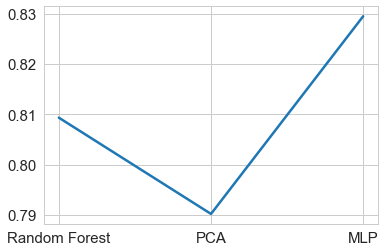

In [285]:
predict = ['Random Forest', 'PCA', 'MLP']
predict = pd.DataFrame(index=predict)
predict["mean"] = [0.809334354783793,.7901952105322892,.829500667]
plt.plot(predict['mean'])
plt.show()

# Challenge: Create your own NLP network/ Capstone

In [102]:
from collections import Counter
import os, sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import WordPunctTokenizer

ModuleNotFoundError: No module named 'nlp'

In [28]:
#tweets = pd.read_csv('C://Users/ezzan/Downloads/potus.csv')
tweets = pd.read_csv('C://Users/ezzan/Downloads/tweets.csv')
tweets3= pd.read_csv('C://Users/ezzan/Downloads/obama_tweets.csv')
tweets.dtypes

id                           int64
handle                      object
text                        object
is_retweet                    bool
original_author             object
time                        object
in_reply_to_screen_name     object
in_reply_to_status_id      float64
in_reply_to_user_id        float64
is_quote_status               bool
lang                        object
retweet_count                int64
favorite_count               int64
longitude                  float64
latitude                   float64
place_id                    object
place_full_name             object
place_name                  object
place_type                  object
place_country_code          object
place_country               object
place_contained_within      object
place_attributes            object
place_bounding_box          object
source_url                  object
truncated                     bool
entities                    object
extended_entities           object
dtype: object

In [32]:
tweets3.head()
tweets.rename(columns={'Date':'time'}, inplace=True)
#tweets.rename(columns={'Favorites':'favorite_counts'}, inplace=True)
tweets.rename(columns={'Tweet ID':'id'}, inplace=True)
tweets = tweets[['handle','text']]
tweets.describe()

handle                       text
count             6444                       6444
unique               2                       6434
top     HillaryClinton  MAKE AMERICA GREAT AGAIN!
freq              3226                          8

In [34]:

tweets3.rename(columns={'Text':'text'}, inplace=True)
tweets3.rename(columns={'Date':'time'}, inplace=True)
tweets3.rename(columns={'Tweet ID':'id'}, inplace=True)
tweets3.rename(columns={'Favorites':'favorite_counts'}, inplace=True)
#tweets['retweet'] = np.where(tweets['is_retweet']==True,1,0)
tweets3["handle"] = "BarackObama"
tweets3 = tweets3[['handle','text']]


C:\Users\ezzan\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [25]:
#tweets2 = pd.read_csv('C://Users/ezzan/Downloads/pol_accounts.csv')

#tweets=tweets.drop(['place_full_name','place_id','place_name','place_type','retweet','retweet_count','source_url'], axis=1)
frames = [tweets, tweets3]
tweets = pd.concat(frames)
tweets.tail(100)

handle                                               text
6634  BarackObama  "If Congress does nothing, every family in Ame...
6635  BarackObama  "Our ultimate goal is an agreement that gets o...
6636  BarackObama  "The voices of the American people have to be ...
6637  BarackObama  "This debate is not just about numbers. It's a...
6638  BarackObama  President Obama: Deadlines on taxes and defici...
6639  BarackObama  Watch live: President Obama speaks on the need...
6640  BarackObama  President Obama kept his promise to cut taxes ...
6641  BarackObama  If you’re wondering why Congress needs to take...
6642  BarackObama  New in the campaign store: a limited-edition v...
6643  BarackObama  From the archives: Sasha and her first mate.pi...
6644  BarackObama  Every American family's taxes will automatical...
6645  BarackObama  A look at why our economy can't afford tax hik...
6646  BarackObama  2.2 million volunteers, nearly 1.8 million vot...
6647  BarackObama  President Obama is working with leaders of bot...
6648  BarackObama  President Obama wishes you a happy Thanksgivin...
6649  BarackObama  From this family to yours, happy Thanksgiving....
6650  BarackObama  "We give thanks—not only for the people we lov...
6651  BarackObama  "Once again, Nate Silver completely nailed it....
6652  BarackObama  The President's plan to keep your taxes low an...
6653  BarackObama  Make sure your friends know about the Presiden...
6654  BarackObama  Take a few minutes to weigh in on the future o...
6655  BarackObama  Happy birthday, Mr. Vice President.pic.twitter...
6656  BarackObama  This movement has always belonged to you. Take...
6657  BarackObama  "That’s the message I heard loud and clear in ...
6658  BarackObama  President Obama: "Let’s begin our work by doin...
6659  BarackObama  "What folks are looking for—and I think all of...
6660  BarackObama  Millions of supporters and volunteers powered ...
6661  BarackObama  Watch President Obama discuss his plans for th...
6662  BarackObama  Share what President Obama’s re-election means...
6663  BarackObama  “My favorite moment: Traveling to Florida from...
...           ...                                                ...
6704  BarackObama  President Obama recorded an Election Day messa...
6705  BarackObama  Pennsylvania: Polls close at 8pm ET, and you c...
6706  BarackObama  Ohio and North Carolina: Polls close at 7:30pm...
6707  BarackObama  If you’re in line when the polls close, stay i...
6708  BarackObama  Don't watch this video: http://OFA.BO/rJXn6c ,...
6709  BarackObama  Just a handful of votes could decide this elec...
6710  BarackObama  This guy's counting on you: http://OFA.BO/Q2se...
6711  BarackObama  Already voted? Get on the phone and help turn ...
6712  BarackObama  Will Ferrell will do anything to get you and y...
6713  BarackObama  Ohio: This election could come down to just a ...
6714  BarackObama  Jay Z wants you in a voting state of mind toda...
6715  BarackObama  This election is close, and your vote could ma...
6716  BarackObama  Spread the word: You can still make the differ...
6717  BarackObama  If he can find the time to make calls today, s...
6718  BarackObama  Today, always be doing something: http://OFA.B...
6719  BarackObama  Just a few votes could make the difference in ...
6720  BarackObama  We're coming to the end of a long campaign—all...
6721  BarackObama  Share why you're voting for President Obama to...
6722  BarackObama  Carol from NH is voting for Obama-Biden becaus...
6723  BarackObama  “I trust President Obama. I do not trust Mitt ...
6724  BarackObama  “It's been years since I've felt connected at ...
6725  BarackObama  “I am a military wife with 6 children, and the...
6726  BarackObama  Amanda, AK: “I am supporting President Obama a...
6727  BarackObama  Check out a few voters’ reasons for supporting...
6728  BarackObama  Time to vote! Grab a friend to join you and he...
6729  BarackObama  25 reasons that 25 people are voting for Presi...
6730  Bar

In [7]:
from wordcloud import WordCloud

In [35]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_tweet(raw_tweet):
    # 1. Remove HTML
    soup = BeautifulSoup(raw_tweet)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    #stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    #meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

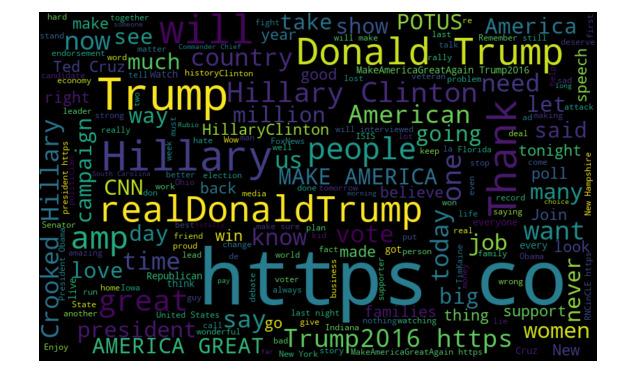

In [36]:
all_words = ' '.join([text for text in tweets['text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [103]:
import nltk
import re
from nltk.corpus import stopwords

stop_words = nltk.corpus.stopwords.words('english')

# from visual inspection of corpus adding to our stopword list
more_stops = ['aa', 'ab', 'abc', 'abcd', 'xxx', 'xyz', 'xii', 'dr', 'x', 'mg', 'p', 'ml', 'right', 'left']

stop_words = stop_words + more_stops
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [106]:
wpt = nltk.WordPunctTokenizer()

def normalize_document(doc):
    # visual inspection shows a lot of dashes between words
    # I don't want the words to run together so replacing with spaces before stripping special characters
    doc = doc.replace('-', ' ')
    # replacing : with whitespace to ensure words don't run together
    doc = re.sub(r'[:]', ' ', doc)
    # replacing . with whitespace to help tokenizer capture correct sentences
    doc = re.sub(r'[.]', ' ', doc)
    # lowercase and remove all nonalphanumeric characters
    doc = re.sub(r'([^\s\w]|_)+', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # remove non-alpha characters
    tokens = filter(lambda x: x.isalpha(), tokens)
    # filter out stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)

tweets['text'] = normalize_corpus(tweets.text)
tweets.head(100)

C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


handle                                               text  \
0    HillaryClinton  question election put plans action make life b...   
1    HillaryClinton  last night donald trump said paying taxes smar...   
2    HillaryClinton  couldnt proud hillaryclinton vision command la...   
3    HillaryClinton  stand together theres nothing cant make sure y...   
4    HillaryClinton  candidates asked theyd confront racial injusti...   
5   realDonaldTrump  join rally tomorrow mid america center council...   
6    HillaryClinton  election important sit go https cottgeqxnqym m...   
7    HillaryClinton  donald trump goes low register vote https cott...   
8   realDonaldTrump  government people join movement today https co...   
9    HillaryClinton  trump offered single proposal reduce friction ...   
10   HillaryClinton  election weeks away check youre registered vot...   
11  realDonaldTrump  national voterregistrationday make sure youre ...   
12  realDonaldTrump  hillary clintons campaign continues make false...   
13  realDonaldTrump  cnbc time magazine online polls say donald tru...   
14   HillaryClinton  donald trump lied american people least times ...   
15  realDonaldTrump  great afternoon little havana hispanic communi...   
16  realDonaldTrump  last hrs raised online donations national call...   
17   HillaryClinton  gained pounds months like eating machine trump...   
18   HillaryClinton  nationalvoterregistrationday celebrate registe...   
19   HillaryClinton  love country im proud country want leader brin...   
20   HillaryClinton  dont want turn want work one another want set ...   
21   HillaryClinton  hear opponent dangerously incoherent unclear h...   
22   HillaryClinton  one candidate made clear wasnt prepared last n...   
23   HillaryClinton  kind person would want root million families l...   
24   HillaryClinton  dont think family pay income child care hillar...   
25   HillaryClinton  im really glad dad never contract donald trump...   
26   HillaryClinton                     work hard living poverty https   
27  realDonaldTrump  well theyre saying nbc presidential forum last...   
28   HillaryClinton  may record setting turnout election could bigg...   
29   HillaryClinton  go https cottgeqxnqym make sure registered hop...   
..              ...                                                ...   
70  realDonaldTrump                   thank senator tedcruz maga https   
71   HillaryClinton  timkaine thats wellesley girls clear hillarycl...   
72   HillaryClinton                                  debatenight https   
73   HillaryClinton  donald trump called miss piggy miss housekeepi...   
74   HillaryClinton                 hillary clinton needed https https   
75   HillaryClinton  tonight heard two candidates one president imw...   
76   HillaryClinton    hillary big time shut hardballchris debatenight   
77   HillaryClinton  clinton debate part stamina trump flagged badl...   
78   HillaryClinton  presidency isnt reality showits real gets make...   
79   HillaryClinton  text imwithher tell hillary youre team way ele...   
80   HillaryClinton  gracias señora hillaryclinton su respeto las m...   
81   HillaryClinton  rt youre proud standing hillary tonight debate...   
82   HillaryClinton  hillary proved shes candidate whos ready presi...   
83  realDonaldTrump  hillaryclintons nuclear agreement paved way mi...   
84  realDonaldTrump  nothing emails nothing corrupt clinton foundat...   
85   HillaryClinton  donald trump says winning temperament debateni...   
86   HillaryClinton  woman trump called miss piggy name alicia deba...   
87  realDonaldTrump  hillaryclinton obama isis strategy allowed exp...   
88   HillaryClinton  donald trump spends hours testifying front con...   
89  realDonaldTrump  realdonaldtrump calling hillaryclintons suppor...   
90   HillaryClinton  donald trumps cavalier attitude nuclear weapon...   
91  realDonaldTrump  russia warheads ever n korea testing nukes ira...   
92   HillaryClint

In [116]:
tweets

handle                                               text  \
0      HillaryClinton  question election put plans action make life b...   
1      HillaryClinton  last night donald trump said paying taxes smar...   
2      HillaryClinton  couldnt proud hillaryclinton vision command la...   
3      HillaryClinton  stand together theres nothing cant make sure y...   
4      HillaryClinton  candidates asked theyd confront racial injusti...   
5     realDonaldTrump  join rally tomorrow mid america center council...   
6      HillaryClinton  election important sit go https cottgeqxnqym m...   
7      HillaryClinton  donald trump goes low register vote https cott...   
8     realDonaldTrump  government people join movement today https co...   
9      HillaryClinton  trump offered single proposal reduce friction ...   
10     HillaryClinton  election weeks away check youre registered vot...   
11    realDonaldTrump  national voterregistrationday make sure youre ...   
12    realDonaldTrump  hillary clintons campaign continues make false...   
13    realDonaldTrump  cnbc time magazine online polls say donald tru...   
14     HillaryClinton  donald trump lied american people least times ...   
15    realDonaldTrump  great afternoon little havana hispanic communi...   
16    realDonaldTrump  last hrs raised online donations national call...   
17     HillaryClinton  gained pounds months like eating machine trump...   
18     HillaryClinton  nationalvoterregistrationday celebrate registe...   
19     HillaryClinton  love country im proud country want leader brin...   
20     HillaryClinton  dont want turn want work one another want set ...   
21     HillaryClinton  hear opponent dangerously incoherent unclear h...   
22     HillaryClinton  one candidate made clear wasnt prepared last n...   
23     HillaryClinton  kind person would want root million families l...   
24     HillaryClinton  dont think family pay income child care hillar...   
25     HillaryClinton  im really glad dad never contract donald trump...   
26     HillaryClinton                     work hard living poverty https   
27    realDonaldTrump  well theyre saying nbc presidential forum last...   
28     HillaryClinton  may record setting turnout election could bigg...   
29     HillaryClinton  go https cottgeqxnqym make sure registered hop...   
...               ...                                                ...   
6414  realDonaldTrump  wise move ted cruz renounced canadian citizens...   
6415  realDonaldTrump  macys one worst performing stocks sampp last y...   
6416  realDonaldTrump  failing unionleader newspaper n h sent trump o...   
6417  realDonaldTrump  believe unionleader nh demanding ads look encl...   
6418  realDonaldTrump  wolfblitzer cnnsitroom interview today please ...   
6419  realDonaldTrump  huge crowd expected tomorrow night vt police s...   
6420  realDonaldTrump  dont like samuelljacksons golf swing athletic ...   
6421  realDonaldTrump  dont cheat golf samuelljackson cheatswith game...   
6422  realDonaldTrump  happy birthday son erictrump proud https cozhm...   
6423  realDonaldTrump  germany going massive attacks people migrants ...   
6424  realDonaldTrump  beckerberta trump single handedly politician e...   
6425  realDonaldTrump  arkaysdesign slone realdonaldtrump get people ...   
6426  realDonaldTrump  compresphyllis seanhannity foxnews glad u trum...   
6427  realDonaldTrump  realdonaldtrump women make fastest growing mar...   
6428  realDonaldTrump  realdonaldtrump mr trump excellent seanhannity...   
6429  realDonaldTrump  dantegtmeyer isis reportedly murders spies cal...   
6430  realDonaldTrump  boazziz danscavino somewhere crowd gymnasium e...   
6431  realDonaldTrump  rubinsteinnel realdonaldtrump pearlbrendan dph...   
6432  realDonaldTrump  realdonaldtrump gave awesome speech claremont ...   
6433  realDonaldTrump  pearlbrendan dphilbs realdonaldtrump doesnt wi...   
6434  realDonaldTrump  new hampshire received great news reuter

In [57]:
count_vect = CountVectorizer()

In [58]:
X = tweets.drop(["handle"], axis=1)
y = tweets["handle"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
train_data_bow = count_vect.fit_transform(X_train['text'])
test_data_bow = count_vect.transform(X_test['text'])

In [61]:
tfid_vect = TfidfVectorizer()

In [62]:
train_data_tfid = tfid_vect.fit_transform(X_train['text'])
test_data_tfid = tfid_vect.transform(X_test['text'])

In [63]:
train_data_tfid.shape

(4833, 8410)

In [64]:
rfc = ensemble.RandomForestClassifier()
crs = cross_val_score(rfc, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.88865979 0.88429752 0.86956522 0.88612836 0.87991718 0.8757764
 0.8426501  0.87784679 0.873706   0.873706  ]
Mean of Folds are =  0.8752253380728178


In [65]:
svc = SVC()
crs =cross_val_score(svc, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())


Cross-Valid Fold Results are:  [0.50309278 0.50413223 0.50310559 0.50310559 0.50310559 0.50310559
 0.50310559 0.50310559 0.50310559 0.50310559]
Mean of Folds are =  0.5032069735407008


In [66]:
svcl = SVC(kernel='linear')
crs =cross_val_score(svcl, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())


Cross-Valid Fold Results are:  [0.90309278 0.87603306 0.9068323  0.91718427 0.89855072 0.90890269
 0.9068323  0.89026915 0.91925466 0.89440994]
Mean of Folds are =  0.9021361866201115


In [67]:
gbc = ensemble.GradientBoostingClassifier()
crs =cross_val_score(gbc, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.87835052 0.84504132 0.84057971 0.85300207 0.85921325 0.84057971
 0.84057971 0.83850932 0.84679089 0.84679089]
Mean of Folds are =  0.8489437386432211


In [68]:
lr = LogisticRegression()
crs = cross_val_score(lr, train_data_bow, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.90721649 0.90082645 0.90062112 0.92132505 0.91511387 0.92339545
 0.91925466 0.87991718 0.91718427 0.9068323 ]
Mean of Folds are =  0.9091686833465896


# Bigrams

In [69]:
count_vect_bigram = CountVectorizer(ngram_range=(1,2))
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train['text'])
test_data_bow_bigram = count_vect_bigram.transform(X_test['text'])


In [70]:

crs = cross_val_score(lr, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Bigram Fold Results are:  [0.91134021 0.90909091 0.92339545 0.91511387 0.91718427 0.9068323
 0.91718427 0.89440994 0.91097308 0.91511387]
Mean of Folds are =  0.9120638154613951


In [71]:
svcl = SVC(kernel='linear')
crs =cross_val_score(svcl, train_data_bow_bigram, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.90515464 0.90082645 0.91718427 0.92132505 0.92132505 0.91304348
 0.91304348 0.89026915 0.93167702 0.91304348]
Mean of Folds are =  0.9126892058541134


# Trigrams

In [72]:
count_vect_trigram = CountVectorizer(ngram_range=(1,3))
train_data_bow_trigram = count_vect_trigram.fit_transform(X_train['text'])
test_data_bow_trigram = count_vect_trigram.transform(X_test['text'])

In [73]:
crs = cross_val_score(lr, train_data_bow_trigram, y_train, cv=10)
print("Cross-Valid trigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid trigram Fold Results are:  [0.90927835 0.90909091 0.92339545 0.91511387 0.91925466 0.89855072
 0.90890269 0.88198758 0.91304348 0.91097308]
Mean of Folds are =  0.9089590791697469


In [74]:
X = tweets['text']
y = tweets['handle']

In [75]:

tfidf_vector1 =  TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=True,
                                max_df=0.5, # drop words with df of greater than .5                                
                                min_df=2, # words must occur twice 
                                lowercase=True, # lowercase everything
                               )

train_data_tfidf1 = tfidf_vector1.fit_transform(X_train['text'])
test_data_tfidf1 = tfidf_vector1.transform(X_test['text'])

In [76]:

X_tfidf = tfidf_vector1.fit_transform(X)
#print(X_tfidf)
from sklearn.preprocessing import normalize
normX_tfidf = normalize(X_tfidf)

# use kmeans  minibatch on 4 clusters

kmeans = MiniBatchKMeans(n_clusters=4, init='k-means++', batch_size=500)
kmeans.fit(normX_tfidf)

# get some metrics on our data

print("Homogeneity Score is: {:.3f}".format(metrics.homogeneity_score(y, kmeans.labels_)))
print("Completeness Score: {:.3f}".format(metrics.completeness_score(y, kmeans.labels_)))
print("V-measure Score: {:.3f}".format(metrics.v_measure_score(y, kmeans.labels_)))
print("Adjusted Rand-Index Score: {:.3f}".format(metrics.adjusted_rand_score(y, kmeans.labels_)))
print("Silhouette Coefficient Score: {:.3f}".format(metrics.silhouette_score(normX_tfidf, kmeans.labels_, sample_size=5000)))

Homogeneity Score is: 0.031
Completeness Score: 0.019
V-measure Score: 0.023
Adjusted Rand-Index Score: 0.026
Silhouette Coefficient Score: 0.006


In [77]:
from sklearn.utils import shuffle
X = tweets
X['kmcluster'] = kmeans.labels_

C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:

print(shuffle(X[X.kmcluster == 0][['text','handle']]).head(100))

                                                   text           handle
817   clintons proposals would revolutionize treat y...   HillaryClinton
4449           man gop selected nominee president https   HillaryClinton
967   cant cozy dictators stand cant contain isis mu...   HillaryClinton
414                 interesting take katiepavlich https  realDonaldTrump
6222  ted cruz complains views eminent domain withou...  realDonaldTrump
2692  light horrible attack nice france postponed to...  realDonaldTrump
4956  wow great new poll new york thank support newy...  realDonaldTrump
3475  trumps statements liesbut tells distract fact ...   HillaryClinton
597   hillaryclinton best choice lead us economy via...   HillaryClinton
1290  participating town hall event hosted seanhanni...  realDonaldTrump
5457  thank portland maine makeamericagreatagain htt...  realDonaldTrump
3265  estoy indignado por la falta de acción para pa...   HillaryClinton
5195  rallies utah arizona great tremendous crowds 

In [79]:
print(shuffle(X[X.kmcluster == 1][['text','handle']]).head(100))

                                                   text           handle
1367  potus joebiden businesses created million new ...   HillaryClinton
965   last thing need president brings name calling ...   HillaryClinton
5599  failed presidential candidate mittromney made ...  realDonaldTrump
1154  clintinfdn people hiv aids poor countries got ...   HillaryClinton
4208  international day homophobia transphobia lets ...   HillaryClinton
2214  kind man roots economic crash cost millions pe...   HillaryClinton
5471  looks like two time failed candidate mitt romn...  realDonaldTrump
5627  wardii oh great mittromney senatorreid realdon...  realDonaldTrump
2249  need comprehensive immigration reform keep fam...   HillaryClinton
3518  murder innocent people always breaks hearts sc...   HillaryClinton
1149  fact clintonfdn helps million people hivaids w...   HillaryClinton
2133  never made fun people disabilities tried empow...   HillaryClinton
1479  young people face tough challenges ability so

In [91]:
print(shuffle(X[X.kmcluster == 2][['text','handle']]).head(100))

                                                   text           handle
2623  think party make terrible mistake cleveland co...   HillaryClinton
4979  theresacali gop screws trump millions walk gop...  realDonaldTrump
418   brave men women served country deserve better ...   HillaryClinton
1962  trump makes funny obvious joke russia going hi...  realDonaldTrump
5917  piersmorgan jeb bush ineffectual ever always d...  realDonaldTrump
3412  votetrumpmaga media attack realdonaldtrump rel...  realDonaldTrump
304   trump cannot trusted charity supposed believe ...   HillaryClinton
804   donald trump leads hillary clinton points amon...  realDonaldTrump
1797  watch khizrkhan asks mitch mcconnell paul ryan...   HillaryClinton
588   danny williams wife leah lost home trump unive...   HillaryClinton
6310  donaldjtrumpjr ivankatrump erictrump obvious r...  realDonaldTrump
3339  elizabethforma mittromney agree trump would pu...   HillaryClinton
55            trump bar full undecideds democrats h

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], 
                                                    X['handle'], test_size = 0.25, random_state = 42)

normX_train_tfidf = normalize(tfidf_vector1.fit_transform(X_train))
normX_test_tfidf = normalize(tfidf_vector1.transform(X_test))


km = MiniBatchKMeans(n_clusters=4, init='k-means++', batch_size=5000)

km.fit(normX_train_tfidf)
km_train_label = km.labels_
km_test_label = km.predict(normX_test_tfidf)


from scipy.sparse import coo_matrix, hstack


In [81]:

X_train_km = hstack([train_data_bow_bigram,pd.DataFrame(km_train_label)])
X_test_km = hstack([test_data_bow_bigram,pd.DataFrame(km_test_label)])


lr = LogisticRegression()
lr.fit(X_train_km,y_train)

print('Training set score:', lr.score(X_train_km, y_train))
print('\nTest set score:', lr.score(X_test_km, y_test))

Training set score: 0.9971032484998965

Test set score: 0.9118559900682806


In [82]:
tfidf_vector1 =  TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=False, sublinear_tf=True,
                                max_df=0.5, # drop words with df of greater than .5                                
                                min_df=2, # words must occur twice 
                                lowercase=True, # lowercase everything
                               )

train_data_tfidf1 = tfidf_vector1.fit_transform(X_train)
test_data_tfidf1 = tfidf_vector1.transform(X_test)

lr = LogisticRegression()
crs = cross_val_score(lr, train_data_tfidf1, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.89896907 0.90495868 0.91511387 0.9068323  0.89233954 0.90890269
 0.90890269 0.87784679 0.91925466 0.90269151]
Mean of Folds are =  0.9035811807821913


In [93]:
dfs = ['realDonaldTrump,BarackObama,HilarryClinton']

lr = LogisticRegression()
lr.fit(train_data_tfidf1,y_train)

print('Training set score:', lr.score(train_data_tfidf1, y_train))
print('\nTest set score:', lr.score(test_data_tfidf1, y_test))

y_pred = lr.predict(test_data_tfidf1)

conf = confusion_matrix(y_test, y_pred, labels = dfs)

cm = pd.DataFrame(conf, index = [i for i in dfs],
                  columns = [i for i in dfs])
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt = 'd')

Training set score: 0.9507552244982412

Test set score: 0.8950962135319678


ValueError: At least one label specified must be in y_true

In [95]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [96]:
svd= TruncatedSVD(250)

lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(train_data_tfidf1)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(10):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 40.57144109552749
Component 0:
text
thank america makeamericagreatagain https                                 0.757073
thank america makeamericagreatagain https                                 0.757073
thank america makeamericagreatagain https                                 0.757073
great new numbers thank makeamericagreatagain https https cogfynuwwcyn    0.717984
thank make america great https                                            0.710464
thank makeamericagreatagain https https                                   0.708728
thank makeamericagreatagain https                                         0.708728
thank senatorsessions makeamericagreatagain https https                   0.708728
thank northern mariana islandssupertuesday makeamericagreatagain https    0.708728
thank makeamericagreatagain https                                         0.708728
Name: 0, dtype: float64
Component 1:
text
thank senatorsessions makeamericagreatagain htt

In [97]:
X_test_lsa = lsa.transform(test_data_tfidf1)

X_train_combo = hstack([X_train_km, X_train_lsa])
X_test_combo = hstack([X_test_km, X_test_lsa])

lr = LogisticRegression()
crs = cross_val_score(lr, X_train_combo, y_train, cv=10)
print("Cross-Valid Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())

Cross-Valid Fold Results are:  [0.91134021 0.90909091 0.92546584 0.92546584 0.91925466 0.9047619
 0.91925466 0.90062112 0.91097308 0.91925466]
Mean of Folds are =  0.9145482875110844


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# We can use the TfidfVectorizer to find ngrams for us
vect = TfidfVectorizer(ngram_range=(2,5), stop_words='english')

# Pulls all of trumps tweet text's into one giant string
summaries = "".join(tweets['text'])
ngrams_summaries = vect.build_analyzer()(summaries)

Counter(ngrams_summaries).most_common(100)

[('donald trump', 235),
 ('hillary clinton', 160),
 ('make america', 106),
 ('crooked hillary', 98),
 ('https https', 70),
 ('ted cruz', 69),
 ('httpsdonald trump', 67),
 ('america great', 66),
 ('new york', 59),
 ('makeamericagreatagain https', 49),
 ('new hampshire', 46),
 ('make sure', 45),
 ('united states', 45),
 ('make america great', 37),
 ('commander chief', 36),
 ('south carolina', 36),
 ('marco rubio', 34),
 ('foreign policy', 32),
 ('donald trumps', 31),
 ('httpshillary clinton', 28),
 ('httpsdonald trumps', 28),
 ('wall street', 28),
 ('crooked hillary clinton', 28),
 ('tax returns', 27),
 ('video https', 27),
 ('child care', 25),
 ('president united', 25),
 ('north carolina', 24),
 ('years ago', 24),
 ('https httpsthank', 24),
 ('america safe', 23),
 ('hillary https', 23),
 ('httpscrooked hillary', 23),
 ('elizabeth warren', 23),
 ('gun violence', 22),
 ('white house', 22),
 ('president united states', 22),
 ('tickets https', 21),
 ('republican party', 21),
 ('middle class